In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from mlxtend.association import apriori
from mlxtend.preprocessing import OnehotTransactions
import missingno as msno
from matplotlib.colors import LogNorm


# Pandas Printing Options
pd.set_option('display.float_format', lambda x: '%.7f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style('white')

# LOAD

In [2]:
injuries = pd.read_csv("../data/injuries_2013_present.csv", index_col=['DATE'], parse_dates=['DATE'])

# FILTER CONTRIBUTING FACTORS

In [3]:
contributing_factors = injuries[['CONTRIBUTING FACTOR VEHICLE 1',
                                 'CONTRIBUTING FACTOR VEHICLE 2',
                                 'CONTRIBUTING FACTOR VEHICLE 3',
                                 'CONTRIBUTING FACTOR VEHICLE 4',
                                 'CONTRIBUTING FACTOR VEHICLE 5']]

# HELPER FUNCTIONS

In [4]:
def filter_set(row):
    filtered = [element for element in row if str(element) != 'nan']
    filtered = [element for element in filtered if str(element) != 'Unspecified']
    return filtered

def my_generator(contributing_factors):
    for i in contributing_factors.as_matrix():
        if filter_set(i):
            yield filter_set(i)
            
def get_factors(dataset):
    oht = OnehotTransactions()
    oht_ary = oht.fit(dataset).transform(dataset)
    return pd.DataFrame(oht_ary, columns=oht.columns_)

# GET FACTORS

In [5]:
factors_obj = my_generator(contributing_factors)

contributing_factors_to_injuries = [fact for fact in factors_obj]

df = get_factors(contributing_factors_to_injuries)

# RUN APRIORI

In [6]:
results = apriori(df, min_support=0.0001, use_colnames=True)

top_10 = results[results['length'] > 1].sort_values(by='support', ascending=False).head(10)

results['count'] = results['support'] * 18351

In [7]:
reasons = df.sum().sort_values(ascending=False).head(10)

In [8]:
values = reasons.values
labels = reasons.index

In [9]:
reasons

Driver Inattention/Distraction    6247
Failure to Yield Right-of-Way     5701
Backing Unsafely                  1390
Passenger Distraction             1271
Other Vehicular                    693
Traffic Control Disregarded        452
Glare                              445
View Obstructed/Limited            440
Pavement Slippery                  316
Driver Inexperience                304
dtype: int64

# PLOT RESULTS

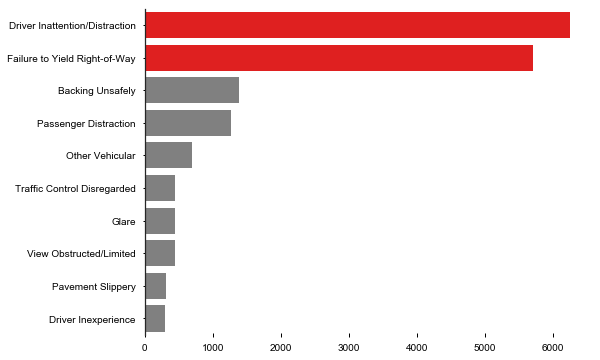

In [10]:
plt.figure(figsize=(8, 6))
colors = ['gray' if (x < 5000) else 'red' for x in values]
sns.barplot(reasons.values, labels, palette=colors)
plt.tick_params(direction='inout', length=4, width=1, colors='black')
sns.despine(bottom=True)